2019 카카오 개발자 겨울 인턴십 - 크레인 인형뽑기 게임

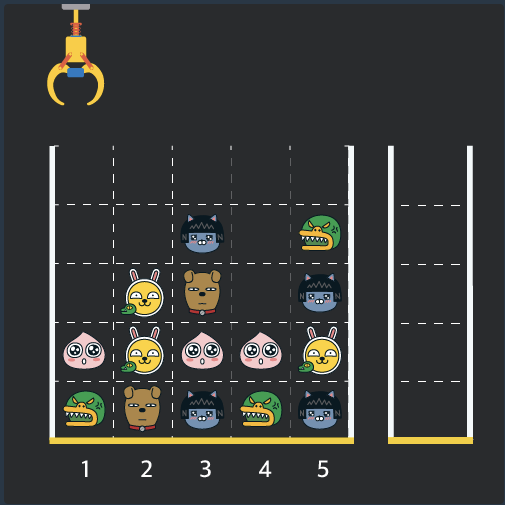

In [1]:
# 내 풀이
# 앞에서부터 0 아닌 값의 index 구하는 기술
import numpy as np

def solution(board, moves):
    result = []   # 바구니(0번째 요소가 맨 밑의 인형)
    cnt = 0       # 사라진 인형 개수
    board_T = np.transpose(board).tolist()   # 세로 기준으로 변환 >> list(zip(*board))로 가능
    
    for m in moves:
        # 앞에서 0이 아닌 숫자(인형)를 pop으로 변수에 저장하고 삭제
        char_idx = next((i for i, x in enumerate(board_T[m-1]) if x), None)  # 0 아닌 값 index, 0이면 None 반환
        if char_idx != None:
            result_ = board_T[m-1].pop(char_idx)
        else:
            continue
        result.append(result_)
        
        while len(result) >= 2:
            if result[-1] == result[-2]:
                del result[-2:]
                cnt += 2     # 사라진 인형 개수 세기
            else:
                break
    return cnt

In [2]:
board = [[0,0,0,0,0],
         [0,0,1,0,3],
         [0,2,5,0,1],
         [4,2,4,4,2],
         [3,5,1,3,1]]
moves = [1,5,3,5,1,2,1,4]
print(np.transpose(board))
print(list(zip(*board)))

[[0 0 0 4 3]
 [0 0 2 2 5]
 [0 1 5 4 1]
 [0 0 0 4 3]
 [0 3 1 2 1]]
[(0, 0, 0, 4, 3), (0, 0, 2, 2, 5), (0, 1, 5, 4, 1), (0, 0, 0, 4, 3), (0, 3, 1, 2, 1)]


In [3]:
# 다른 풀이 1
# 스택을 이용한 풀이
# transpose하지 않고 반복문 2개로 접근, 0이 아닌 값 stacklist에 추가하고 0으로 만듦
def solution(board, moves):
    stacklist = []
    answer = 0

    for i in moves:
        for j in range(len(board)):
            if board[j][i-1] != 0:
                stacklist.append(board[j][i-1])
                board[j][i-1] = 0

                if len(stacklist) > 1:
                    if stacklist[-1] == stacklist[-2]:
                        stacklist.pop(-1)
                        stacklist.pop(-1)
                        answer += 2     
                break

    return answer

In [4]:
# 다른 풀이 2
# := 는 대입 표현식(바다코끼리 연산자). 변수 할당과 동시에 값 사용 가능
def solution(board, moves):
    cols = list(map(lambda x: list(filter(lambda y: y > 0, x)), zip(*board)))
    a, s = 0, [0]

    for m in moves:
        if len(cols[m - 1]) > 0:
            if (d := cols[m - 1].pop(0)) == (l := s.pop()):
                a += 2
            else:
                s.extend([l, d])

    return a

In [5]:
list(map(lambda x: list(filter(lambda y: y > 0, x)), zip(*board)))

[[4, 3], [2, 2, 5], [1, 5, 4, 1], [4, 3], [3, 1, 2, 1]]

### 다른 풀이 2 설명

2번째 줄을 보면, zip(*board)를 함으로써, 원래 board의 각 원소들은 행을 나타내는 리스트들이었는데, *board를 하니까 각 행을 나타내는 리스트가 그 개수만큼 unpacking되었다. 

그렇게 그 각 행을 나타내는 리스트들이 병렬?로 존재하고 있는데 거기에 zip을 하니까, 각 행을 나타내고 있던 리스트들의 앞부분부터 끝부분까지를 하나씩 뱉어낸 걸 모아서 새로운 리스트를 만든다. 

한 행의 입장에서 앞부분부터 끝부분까지라는 말은, 1열부터 마지막열까지를 의미한다. 

그러므로 각 행들의 1열부터 마지막열까지를 받은 것이므로 zip(*board)는 결국 각 열을 나타내는 리스트들을 가지고 있는 셈이다. 

그런데 여기에 map을 통해서 각 열에 대해 lambda를 두 번 사용한 함수를 적용시켜준다. 

lambda x에서는 열을 나타내는 리스트를 x로 받겠다는 것이고, 열을 나타내는 리스트를 받아서 그 리스트 안에 있는 각각의 값(인형)들을 y로 받아서 0보다 큰 값들만 살려준다. 

이 문제에서 0은 인형이 없는 경우이므로 결국에는 2번째 cols = (...)줄을 마치고 나면 cols에는 0번째 원소에는 첫번째 열에 위치한 실재하는 인형들을 나타내는 리스트, 1번째 원소에는 두번째 열을=에 위치한 실재하는 인형들을 나타내는 리스트 이런식으로 넣어지게 된다. 

그리고 s는 bucket의 역할을 하고, a는 터뜨려진 인형의 수를 의미한다. 

s에 처음에 [0]을 넣어주는 이유는 빈 리스트에서 s.pop()을 하면 에러가 발생하므로 그걸 방지하기 위해서 0에 해당하는 인형은 없기 때문에 넣어준 것으로, 에러 발생 방지 이외의 목적은 없다. 

for m in moves: 안을 살펴보면, cols안의 1번째 열을 나타내는 리스트의 첫번째 원소는 그림 상으로 맨 위에 위치해있던 인형이 있고, 마지막 원소는 가장 바닥에 있어야 할 인형이 있다. 

그러므로 cols[m - 1].pop(0)을 하여 위에 있는 것을 빼주는 것이다. 

s.pop()은 기존의 버킷에서 맨 위에 담겨있던 인형을 꺼내는 것이다. 

결국, moves에서 이번에 격자 상에서 가져오는 인형과 버킷의 맨 위에 있던 인형의 값을 비교해준다.

그래서 그 둘이 같으면 인형이 터지는 것이므로 a에 2를 더해주는 것이다. 

그런데 그 둘이 다르면, 현재 버킷의 맨 위에 있던 것을 빼왔기 때문에 그 인형이 버킷의 더 깊숙한 곳에 있어야 하므로 l을 앞에 해주고, 이번에 뽑은 인형 d가 뒤에 있어야 하니까 [l, d]로 만들어서 기존의 버킷에 다시 추가해주는 것이다.

Test Case.
- board : [[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]
- moves : [1,5,3,5,1,2,1,4]
- result : 4